In [17]:
import pandas as pd
file_path='/content/Impact_of_Remote_Work_on_Mental_Health.csv'
data=pd.read_csv(file_path)
data.head()


data_cleaned=data.drop(columns=['Employee_ID'])
data_encoded=pd.get_dummies(data_cleaned,drop_first=True)
data_encoded.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,...,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied,Physical_Activity_Weekly,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,13,47,7,2,1,1,False,True,False,...,False,True,True,True,False,False,True,False,False,False
1,40,3,52,4,1,3,2,False,False,False,...,True,False,True,True,False,True,False,False,False,False
2,59,22,46,11,5,4,5,False,True,False,...,False,True,False,False,True,False,False,True,False,False
3,27,20,32,8,4,3,3,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4,49,32,35,12,2,3,3,True,False,False,...,False,True,True,False,False,False,False,True,False,False


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
x = data_encoded.drop(columns=['Satisfaction_with_Remote_Work_Unsatisfied']) # Removed extra spaces/tab character
y = data_encoded['Satisfaction_with_Remote_Work_Unsatisfied'] # Removed extra spaces/tab character

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print('accuracy score is(in%)', accuracy*100)

accuracy score is(in%) 66.10000000000001


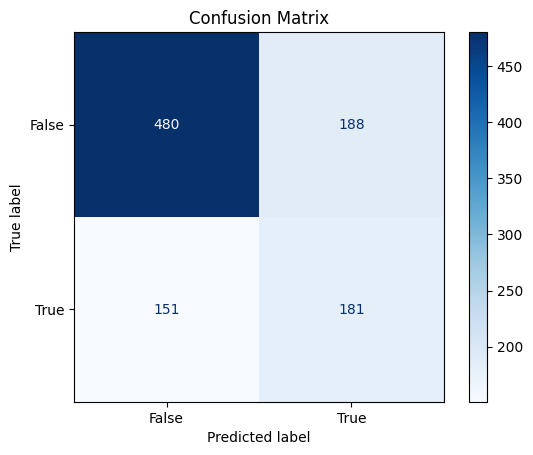

In [28]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

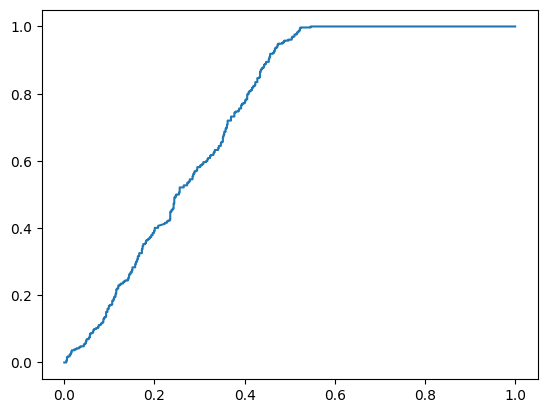

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve

# Initialize the SVC model with probability=True
svm_model = SVC(kernel='linear', C=1.0, probability=True)

# Fit the model to the training data
svm_model.fit(x_train, y_train)

# Now you can use predict_proba
y_prob = svm_model.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr, tpr)